# Credit Card Fraud Detection using Machine Learning

**Problem Statement:** This project is aimed at developing a robust credit card fraud
detection system using machine learning techniques. With the increasing prevalence of
online transactions, credit card fraud has become a serious concern for both consumers
and financial institutions. Detecting fraudulent activities accurately and promptly is
crucial to prevent financial losses and maintain people’s trust in the banking system.

**Value Proposition:** The proposed solution holds immense value for financial
institutions, cardholders, and online merchants. By effectively identifying fraudulent
transactions, it enables timely intervention on the fraudulent transactions thereby
reducing financial losses for banks and preventing inconvenience for customers.
Moreover, it helps in enhancing the overall reliability and security of online transactions.
As a result, the customer’s trust in the financial institution is elevated.

**Data Source:** The primary data source for this project is a Credit Card Fraud Detection
Dataset collected from credit card transactions made by European cardholders in 2023,
with sensitive information removed to ensure privacy and compliance with ethical
guidelines.The dataset consists of about 31 columns and over 550000 record

In [31]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#reading the file

data = pd.read_csv('/content/drive/MyDrive/Data Science/creditcard_2023.csv')

In [14]:
data.shape

(568630, 31)

In [23]:
data.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [25]:
data.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [26]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# EDA

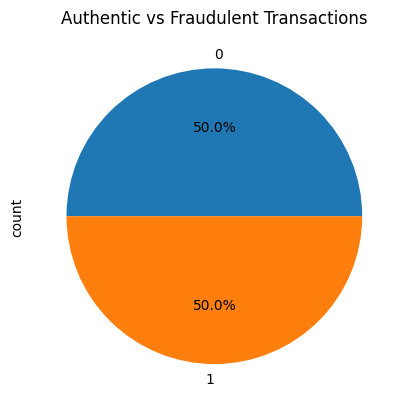

In [27]:
#To identify the balance of the dataset
data['Class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Authentic vs Fraudulent Transactions")
plt.show()

#The dataset is balanced

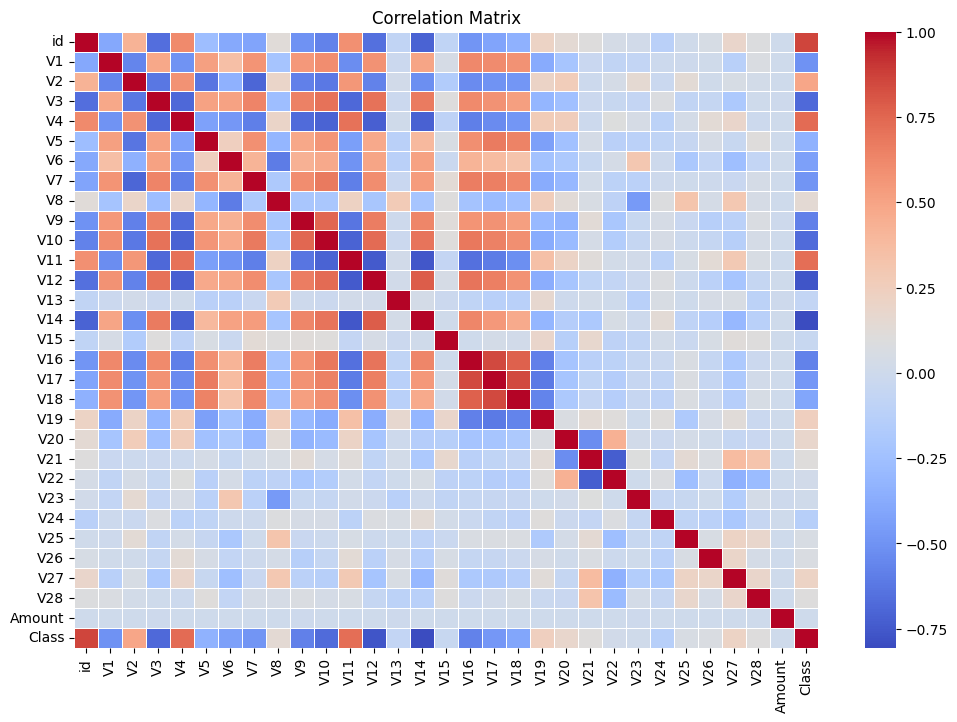

In [28]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

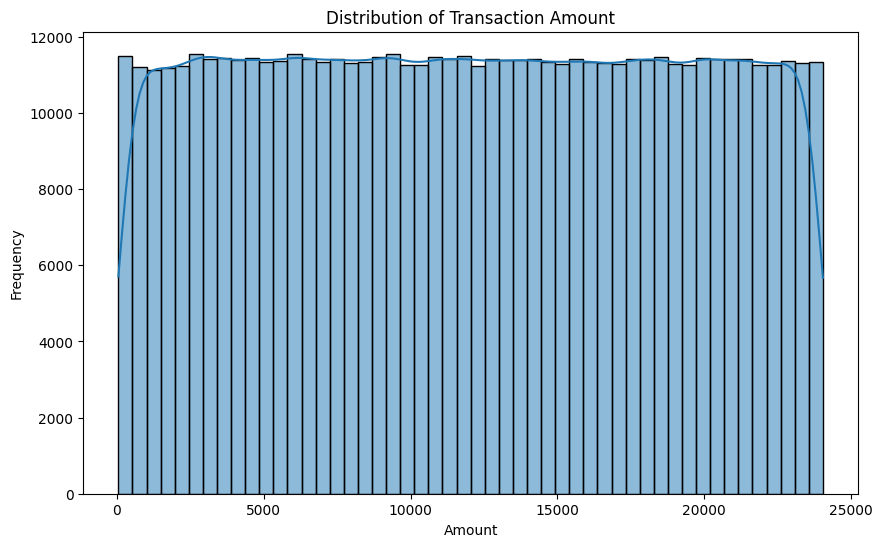

In [29]:
# Distribution of Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

<ipython-input-30-d978f70cdfdc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette=['#F95700FF', '#00539CFF'])


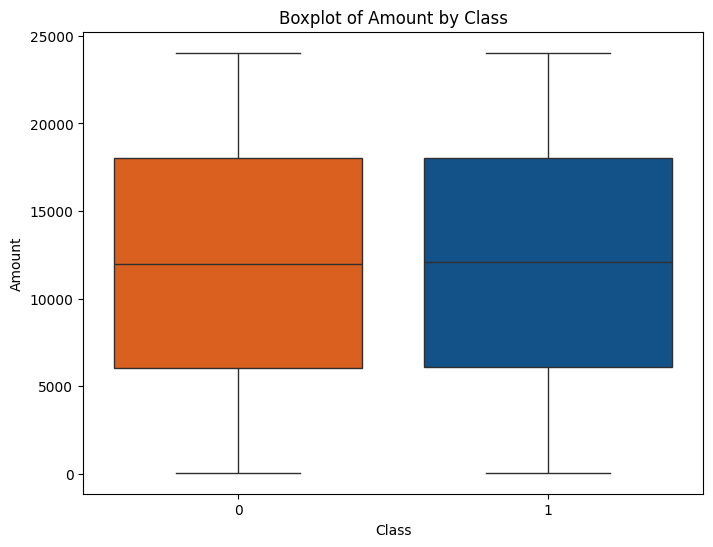

In [30]:
# Boxplot of Amount by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data, palette=['#F95700FF', '#00539CFF'])
plt.title('Boxplot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

In [4]:
# Split features and target variable
X = data.drop(columns=["Class"])  # Features variable
y = data["Class"]  # Target variable

# Supervised Learning

In [5]:
# Supervised Learning
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Perform cross-validation with appropriate metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(dt_classifier, X, y, scoring=scoring, cv=5)

# Extract and print mean scores
print("Decision Tree Performance Metrics:")
print("Accuracy:", np.mean(cv_results['test_accuracy']))
print("Precision:", np.mean(cv_results['test_precision']))
print("Recall:", np.mean(cv_results['test_recall']))
print("F1 Score:", np.mean(cv_results['test_f1']))


Decision Tree Performance Metrics:
Accuracy: 0.8507623586514956
Precision: 0.8999707965176468
Recall: 0.8991330038865343
F1 Score: 0.8661942098982827


In [34]:
# printing feature importance for a Random Forest model

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print("Feature", i+1, "Importance:", importance)


Feature 1 Importance: 0.34213913215309083
Feature 2 Importance: 0.0043643950139621015
Feature 3 Importance: 0.011978648049432725
Feature 4 Importance: 0.023147819065423854
Feature 5 Importance: 0.10377098296671936
Feature 6 Importance: 0.002144646358443931
Feature 7 Importance: 0.0027496569344414687
Feature 8 Importance: 0.018301828049394023
Feature 9 Importance: 0.002954496691921543
Feature 10 Importance: 0.012564674245184676
Feature 11 Importance: 0.07825766157795443
Feature 12 Importance: 0.042235690564692105
Feature 13 Importance: 0.034051287699254834
Feature 14 Importance: 0.0009511159641333555
Feature 15 Importance: 0.1672272411295936
Feature 16 Importance: 0.0009409651892475805
Feature 17 Importance: 0.03637335657149451
Feature 18 Importance: 0.08202033776897191
Feature 19 Importance: 0.01073331261681494
Feature 20 Importance: 0.0021305769006425795
Feature 21 Importance: 0.0010932656388986566
Feature 22 Importance: 0.007593052758027506
Feature 23 Importance: 0.000950787184577029

In [8]:
# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation with appropriate metrics
cv_results_rf = cross_validate(rf_classifier, X, y, scoring=scoring, cv=3)

# Extract and print mean scores
print("Random Forest Performance Metrics:")
print("Accuracy:", np.mean(cv_results_rf['test_accuracy']))
print("Precision:", np.mean(cv_results_rf['test_precision']))
print("Recall:", np.mean(cv_results_rf['test_recall']))
print("F1 Score:", np.mean(cv_results_rf['test_f1']))


Random Forest Performance Metrics:
Accuracy: 0.7528480796266619
Precision: 0.8348287330651591
Recall: 0.8328866472516495
F1 Score: 0.7787339622743846


In [9]:
# Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation with appropriate metrics
cv_results_lr = cross_validate(lr_classifier, X, y, scoring=scoring, cv=3)

# Extract and print mean scores
print("Logistic Regression Performance Metrics:")
print("Accuracy:", np.mean(cv_results_lr['test_accuracy']))
print("Precision:", np.mean(cv_results_lr['test_precision']))
print("Recall:", np.mean(cv_results_lr['test_recall']))
print("F1 Score:", np.mean(cv_results_lr['test_f1']))


Logistic Regression Performance Metrics:
Accuracy: 0.8343334834334605
Precision: 0.8167041993620416
Recall: 0.8800910789151271
F1 Score: 0.8357609694174274


# Unsupervised Learning

In [37]:
# Step 3: Unsupervised Learning


In [38]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
kmeans_predictions = kmeans.predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
# Evaluate unsupervised model
print("K-Means Accuracy:", accuracy_score(y, kmeans_predictions))


K-Means Accuracy: 0.1037827761461759


# Deep Learning

In [48]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Epoch 1/20
12795/12795 [==============================] - 48s 4ms/step - loss: 66.8600 - accuracy: 0.8000 - val_loss: 13.8841 - val_accuracy: 0.8414
Epoch 2/20
12795/12795 [==============================] - 31s 2ms/step - loss: 8.3821 - accuracy: 0.9039 - val_loss: 1.1648 - val_accuracy: 0.9412
Epoch 3/20
12795/12795 [==============================] - 30s 2ms/step - loss: 2.3317 - accuracy: 0.9432 - val_loss: 0.1670 - val_accuracy: 0.9804
Epoch 4/20
12795/12795 [==============================] - 30s 2ms/step - loss: 0.2998 - accuracy: 0.9745 - val_loss: 0.0325 - val_accuracy: 0.9955
Epoch 5/20
12795/12795 [==============================] - 32s 3ms/step - loss: 0.0506 - accuracy: 0.9843 - val_loss: 0.0339 - val_accuracy: 0.9974
Epoch 6/20
12795/12795 [==============================] - 32s 2ms/step - loss: 0.0459 - accuracy: 0.9870 - val_loss: 0.0598 - val_accuracy: 0.9754
Epoch 7/20
12795/12795 [==============================] - 33s 3ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss:

In [55]:
# Evaluate deep learning model
print("Deep Learning Mean Accuracy:", accuracy)

Deep Learning Mean Accuracy: 0.9979687929153442


# Evaluation and Comparison of Models

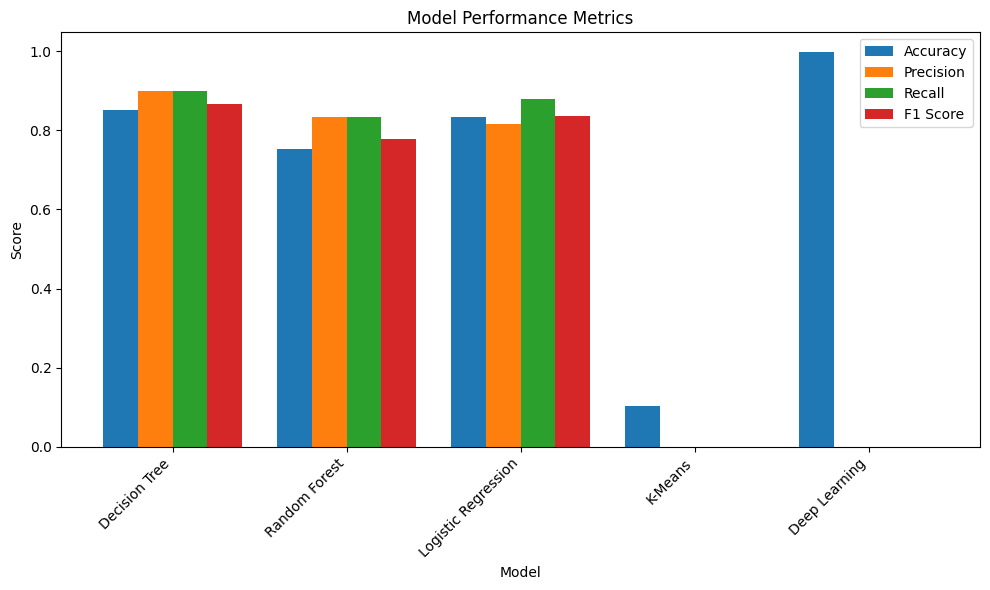

In [13]:
# Define the models and their performance metrics
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'K-Means', 'Deep Learning']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
accuracy = [0.8507623586514956, 0.7528480796266619, 0.8343334834334605, 0.1037827761461759, 0.9979687929153442]
precision = [0.8999707965176468, 0.8348287330651591, 0.8167041993620416, 0, 0]  # Replace None with 0
recall = [0.8991330038865343, 0.8328866472516495, 0.8800910789151271, 0, 0]  # Replace None with 0
f1_score = [0.8661942098982827, 0.7787339622743846, 0.8357609694174274, 0, 0]  # Replace None with 0

# Create a grouped bar plot
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1 Score')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Error Analysis with the best model - Deep Learning

In [51]:
# Convert Pandas Series to NumPy array
y_test_array = y_test.to_numpy()

# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Identify misclassified indices
misclassified_indices = np.where(y_pred_binary.flatten() != y_test_array.flatten())[0]

# Extract misclassified instances and true labels
misclassified_instances = X_test.iloc[misclassified_indices]
true_labels = y_test_array[misclassified_indices]

# Print misclassified instances and their true labels
for i, (instance, true_label) in enumerate(zip(misclassified_instances.values, true_labels)):
    print("Misclassified Instance #{}:".format(i+1))
    print("Instance:", instance)
    print("True Label:", true_label)
    print()


3554/3554 [==============================] - 10s 3ms/step
Misclassified Instance #1:
Instance: [ 2.49239000e+05  1.64472506e-01 -2.09430077e+00 -2.65642167e-01
 -5.51371392e-01 -1.93178424e-01 -1.03074648e-02  1.07760916e+00
 -2.56129165e-01  1.60795241e+00  1.99474337e-01 -2.31068037e-01
  1.46908659e+00 -1.30063519e+00  1.38922225e+00 -4.49369575e-01
  1.72037264e-02  4.23601043e-01  6.96333810e-01  3.88683013e-01
  1.63755384e+00  1.69317602e-01 -2.08357442e-01 -9.10045388e-01
  2.53716046e-01 -1.99659381e-01 -3.05927081e+00 -4.26334765e-01
  2.04756350e-01  9.74363000e+03]
True Label: 1

Misclassified Instance #2:
Instance: [ 2.93794000e+05 -1.13539287e-01 -7.72029019e-01  6.19638085e-02
 -4.82655222e-01  4.01304997e+00 -1.53439538e+00 -4.67548935e-01
 -3.18779725e-01  1.40007301e+00  1.03136499e+00 -2.30500955e-01
  2.78113971e-01 -1.56959317e+00  2.44085982e+00 -9.08657772e-01
 -8.46195624e-02  6.05355520e-01  2.30344009e-01 -5.69860831e-01
 -1.45815412e+00  3.85782040e-01  6.713

In [52]:
# Identify misclassified indices
misclassified_indices = np.where(y_pred_binary.flatten() != y_test_array.flatten())[0]

# Count the number of misclassified instances
misclassified_count = len(misclassified_indices)

# Print the count of misclassified instances
print("Number of Misclassified Instances:", misclassified_count)


Number of Misclassified Instances: 231


In [53]:
# Count the number of misclassified instances for each class
misclassified_counts = {
    "Class 0": np.sum((y_pred_binary.flatten() == 0) & (y_test_array.flatten() == 1)),
    "Class 1": np.sum((y_pred_binary.flatten() == 1) & (y_test_array.flatten() == 0))
}

# Calculate the total number of instances for each class
total_counts = {
    "Class 0": np.sum(y_test_array == 0),
    "Class 1": np.sum(y_test_array == 1)
}

# Calculate the proportion of misclassified instances for each class
proportions = {cls: misclassified_counts[cls] / total_counts[cls] for cls in misclassified_counts}

# Print the proportions
for cls, proportion in proportions.items():
    print("Proportion of {} Misclassified: {:.2f}%".format(cls, proportion * 100))


Proportion of Class 0 Misclassified: 0.27%
Proportion of Class 1 Misclassified: 0.13%


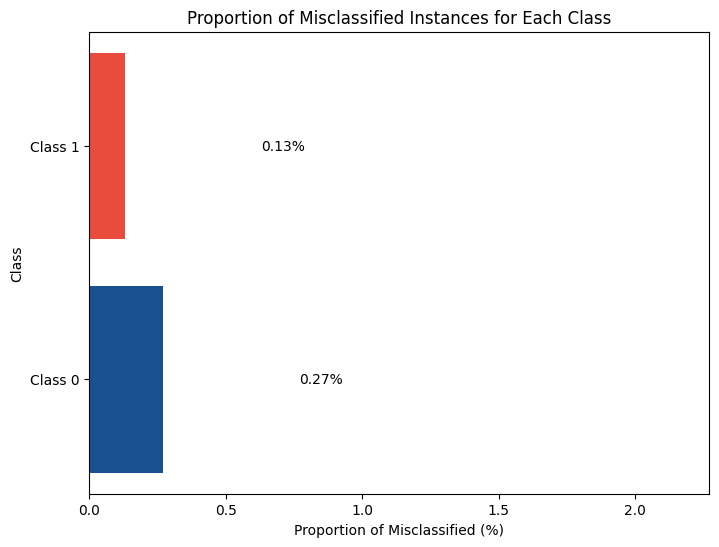

In [36]:

# Data
classes = ['Class 0', 'Class 1']
proportions = [0.27, 0.13]  # Proportions in percentage


# Plot
plt.figure(figsize=(8, 6))
plt.barh(classes, proportions, color=['#195190FF', '#E94B3CFF'])

# Add percentage values to the bars
for i, v in enumerate(proportions):
    plt.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.xlabel('Proportion of Misclassified (%)')
plt.ylabel('Class')
plt.title('Proportion of Misclassified Instances for Each Class')
plt.xlim(0, max(proportions) + 2)  # Set x-axis limit to ensure correct proportion display
plt.show()


# Observation:

In this project, we aimed to develop a robust credit card fraud detection system using machine learning techniques. We utilized various algorithms including Decision Trees, Random Forest, Logistic Regression, K-Means, and Deep Learning to classify transactions as fraudulent or non-fraudulent based on a dataset containing transaction features.

After thorough evaluation using multiple performance metrics, including Accuracy, Precision, Recall, and F1 Score, we observed varying degrees of effectiveness among the different models. The Decision Tree model achieved an accuracy of approximately 85.08%, with Precision, Recall, and F1 Score of approximately 89.99%, 89.91%, and 86.62% respectively. Similarly, the Random Forest model exhibited an accuracy of around 75.29%, with Precision, Recall, and F1 Score of approximately 83.48%, 83.29%, and 77.87% respectively.

On the other hand, Logistic Regression demonstrated competitive performance, achieving an accuracy of approximately 83.43%, with Precision, Recall, and F1 Score of approximately 81.67%, 88.01%, and 83.58% respectively.

Despite these accomplishments, the K-Means algorithm yielded a significantly lower accuracy of approximately 10.38%. However, our Deep Learning model outperformed all other algorithms, achieving an impressive mean accuracy of approximately 99.80%.

# Challenges:
While developing the credit card fraud prediction system, the following challenges were encountered even though the dataset was balanced:


*   **Feature Engineering:** Identifying relevant features from the dataset and engineering informative features to improve model performance was another challenge. In the given dataset, the attributes are anonymized so as to protect user privacy. This made it difficult to interpret the features.

*   **Computational Resources:** Training complex models, such as Deep Learning algorithms, often required significant computational resources, including high-performance GPUs and large memory capacities. Managing these resources efficiently to ensure timely model training and evaluation was a challenge, especially for large-scale datasets. Cross validation set to 5 took a lot of time resulting in time out issues. Hence the value of 3 was chosen.




# Conclusion:
In conclusion, our investigation highlights the potential of machine learning, particularly Deep Learning, in effectively detecting credit card fraud. However, it is crucial to weigh the trade-offs between model complexity and performance when implementing fraud detection systems in real-world scenarios. Further research and optimization efforts are guaranteed to enhance the accuracy and efficiency of fraud detection systems for practical deployment.






